# step1: Import important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step2: Importing the dataset

In [3]:
df=pd.read_csv(r"E:\my courses\courses\mine\ai\Machine Learning\machine learning\datasets\k-means clustring\bank-full.csv")

# Step3: data overview

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Step4: Exploratory data analysis

<Axes: xlabel='age', ylabel='Count'>

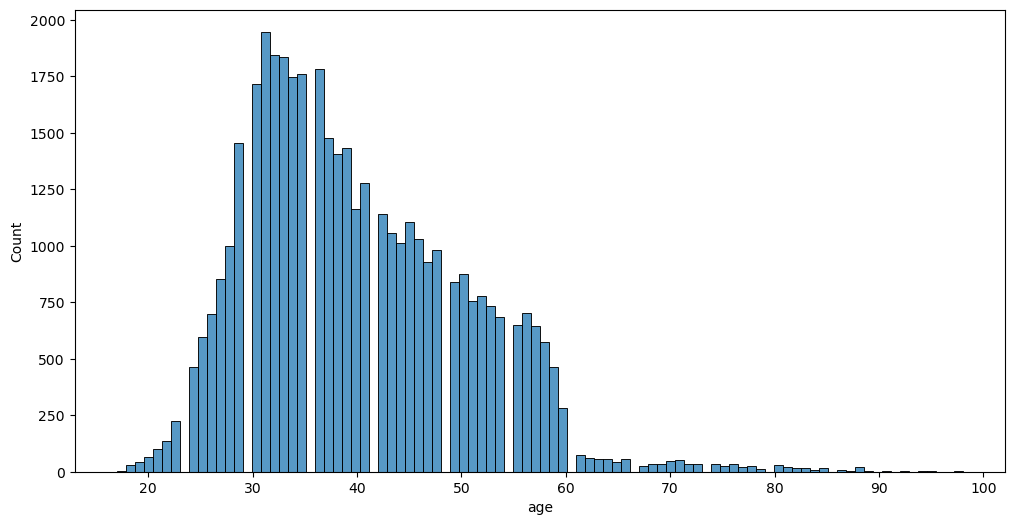

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x="age")

<Axes: xlabel='contact', ylabel='count'>

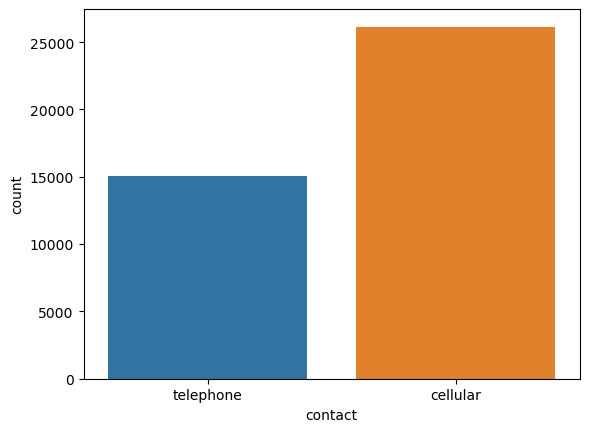

In [8]:
sns.countplot(data=df,x="contact")

<Axes: xlabel='previous', ylabel='count'>

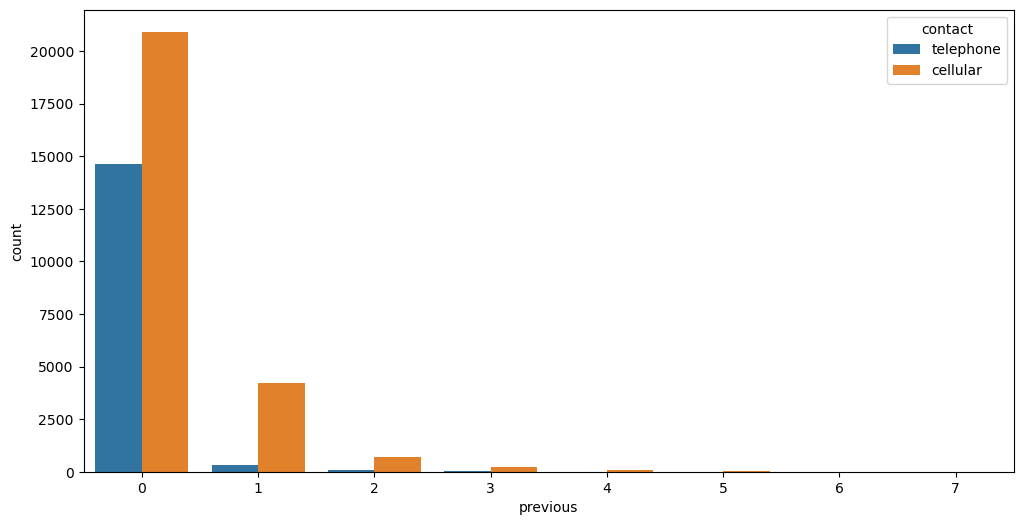

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="previous", hue="contact")

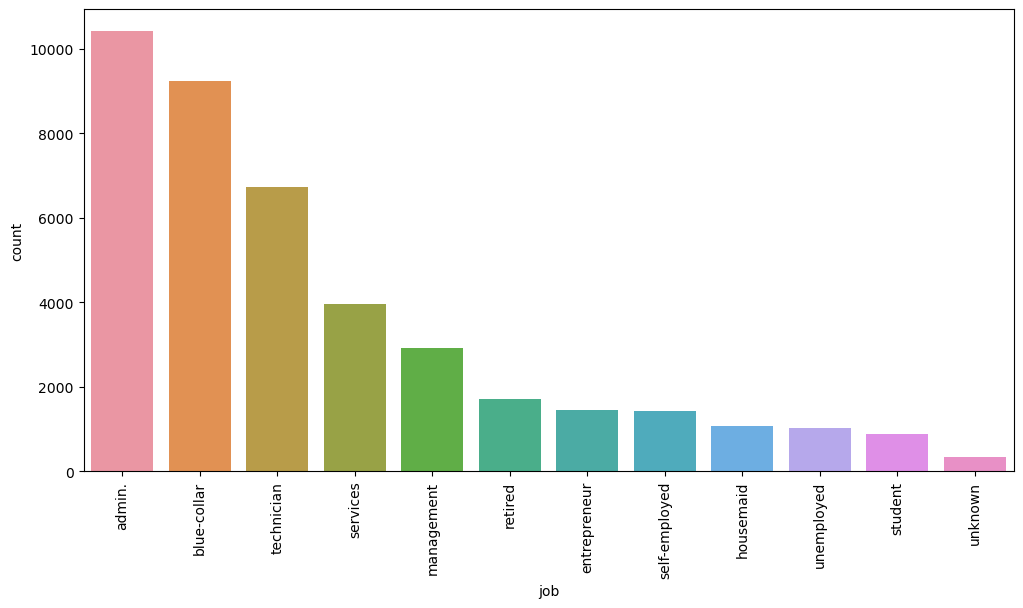

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="job",order=df["job"].value_counts().index)
plt.xticks(rotation=90);

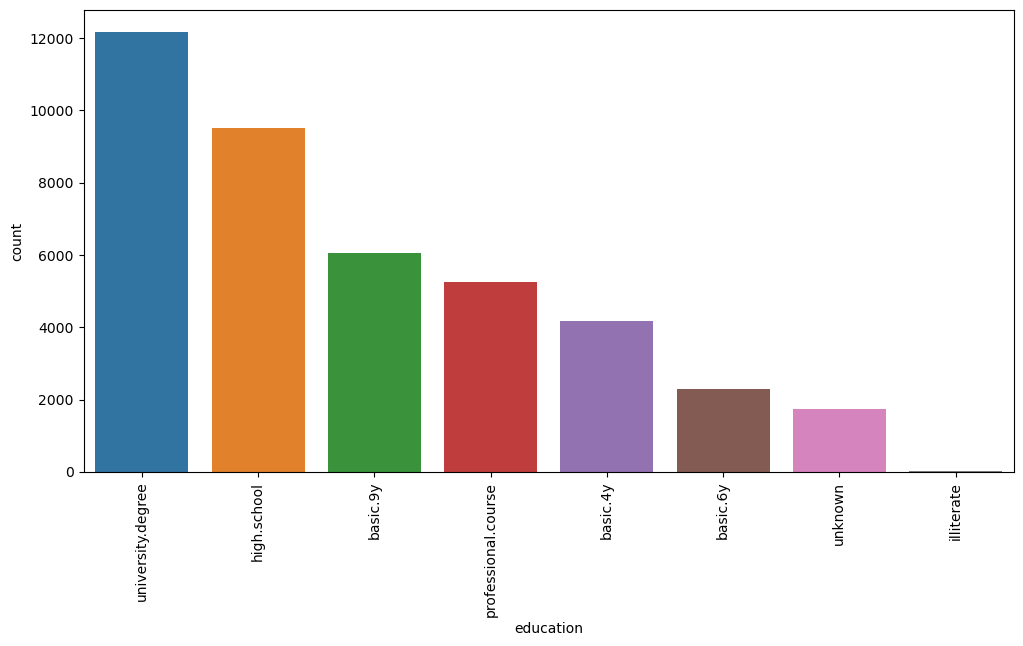

In [11]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="education",order=df["education"].value_counts().index)
plt.xticks(rotation=90);

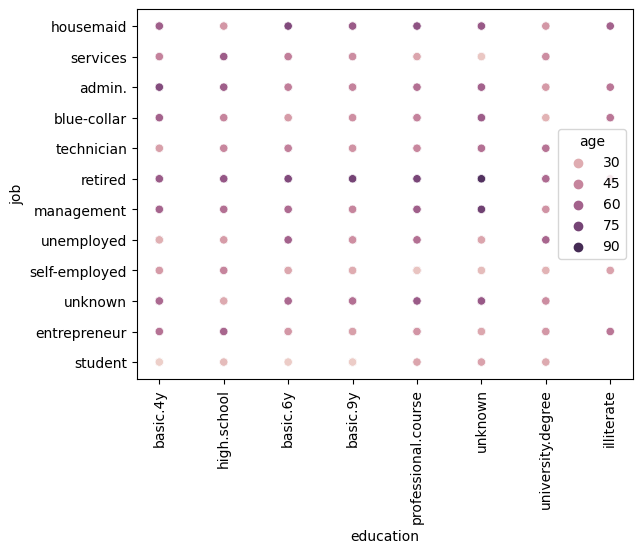

In [18]:
sns.scatterplot(data=df,x="education",y="job",hue="age")
plt.xticks(rotation=90);

# Step5: Data preparing

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
X=pd.get_dummies(df,drop_first=True)

In [23]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,False,True,False,True


# Step6: scalling the features

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler=StandardScaler()

In [26]:
scaled_X=scaler.fit_transform(X)

In [27]:
scaled_X

array([[ 1.53303429,  0.01047142, -0.56592197, ...,  0.39770593,
        -0.1857    , -0.35630932],
       [ 1.62899323, -0.42150051, -0.56592197, ...,  0.39770593,
        -0.1857    , -0.35630932],
       [-0.29018564, -0.12451981, -0.56592197, ...,  0.39770593,
        -0.1857    , -0.35630932],
       ...,
       [ 1.53303429, -0.26722482, -0.20490853, ...,  0.39770593,
        -0.1857    , -0.35630932],
       [ 0.38152696,  0.70856893, -0.56592197, ...,  0.39770593,
        -0.1857    ,  2.80655022],
       [ 3.26029527, -0.07438021,  0.15610492, ..., -2.51442063,
        -0.1857    , -0.35630932]])

# Step7: Creating and fitting a K-means model

In [33]:
from sklearn.cluster import KMeans

In [34]:
model=KMeans(n_clusters=2)

In [36]:
cluster_labels=model.fit_predict(scaled_X)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [37]:
cluster_labels

array([0, 0, 0, ..., 1, 1, 1])

In [38]:
len(scaled_X)

41188

In [39]:
len(cluster_labels)

41188

In [40]:
X["cluster"]=cluster_labels

In [42]:
X.corr()["cluster"].sort_values()

euribor3m                       -0.964411
emp.var.rate                    -0.934869
nr.employed                     -0.892315
cons.price.idx                  -0.676559
poutcome_nonexistent            -0.544988
contact_telephone               -0.405626
cons.conf.idx                   -0.330223
pdays                           -0.269023
month_jul                       -0.267759
default_unknown                 -0.184357
month_aug                       -0.161708
month_jun                       -0.135945
campaign                        -0.128067
marital_married                 -0.087530
job_technician                  -0.046225
job_blue-collar                 -0.037344
month_nov                       -0.036741
job_housemaid                   -0.036153
day_of_week_wed                 -0.029553
day_of_week_tue                 -0.021492
age                             -0.019385
education_basic.6y              -0.018407
education_professional.course   -0.017907
job_unknown                     -0

# Choosing K value

In [43]:
ssd=[]

for k in range(2,10):
    model=KMeans(n_clusters=k)
    model.fit(scaled_X)
    ssd.append(model.inertia_)
    

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

In [44]:
ssd

[2042697.9644462937,
 1947279.279664433,
 1873617.373163845,
 1818496.1642129961,
 1744272.7100180932,
 1716425.6134402046,
 1653702.709898039,
 1633564.7593886505]

Text(0, 0.5, 'SSD')

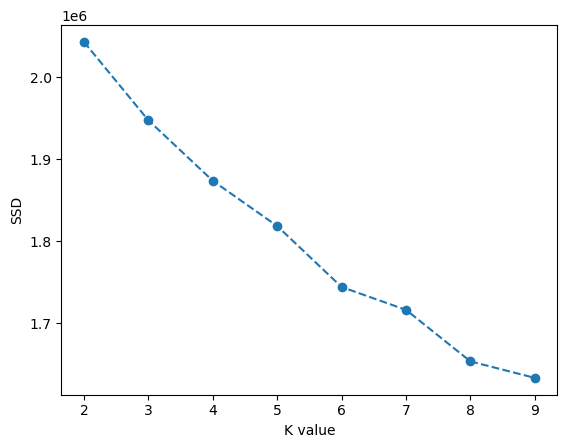

In [46]:
plt.plot(range(2,10),ssd,"o--")
plt.xlabel("K value")
plt.ylabel("SSD")